<a href="https://colab.research.google.com/github/heena-sharma-sys/Machine-Learning/blob/main/LogisticRegressionFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn

1. use sklearn.datasets.make_classification to generate n_class classification problem


In [22]:
from sklearn.datasets import make_classification

# Here we are creating a 2-class classification data, with 50000 samples and 15 features 
X, y = make_classification(n_samples = 50000, n_features = 15, 
                    n_informative = 10, n_redundant = 5, 
                    n_classes = 2, weights = [0.7], 
                    class_sep = 0.7, random_state=15)

2. Split the data into Train and Test using sklearn.model_selection.**train_test_split**

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 15)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37500, 15), (12500, 15), (37500,), (12500,))

3. Standardize the data using sklearn.preprocessing.StandardScaler

StandardScaler: Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples and s is the standard deviation of the training samples

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_standard = scaler.fit_transform(X_train)
x_test_standard = scaler.transform(X_test)

In [26]:
print (x_train_standard.shape)
print (x_test_standard.shape)

(37500, 15)
(12500, 15)


4. Apply SGD classifier sklearn.linear_model.SGDClassifier

Linear classifiers (SVM, logistic regression, etc.) with SGD training.

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).


In [27]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(eta0 = 0.0001, loss='log', alpha=0.0001, 
              random_state=15, penalty='l2', tol=1e-3, 
              verbose=2, learning_rate='constant')
clf

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [28]:
clf.fit(x_train_standard, y_train)

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.501317, T: 37500, Avg. loss: 0.552526
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.752393, T: 75000, Avg. loss: 0.448021
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.902742, T: 112500, Avg. loss: 0.415724
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 15, Bias: -1.003816, T: 150000, Avg. loss: 0.400895
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.076296, T: 187500, Avg. loss: 0.392879
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.131077, T: 225000, Avg. loss: 0.388094
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.171791, T: 262500, Avg. loss: 0.385077
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.203840, T: 300000, Avg. loss: 0.383074
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.229563, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [29]:
clf.coef_, clf.intercept_

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 array([-1.30580538]))

Implement Logistic Regression with L2 regularization Using SGD: without using sklearn

1. Initialize the weight_vector and intercept term to zeros (def initialize_weights())

In [30]:
import numpy as np 

def initialize_weights(dim):
  # numpy.zeros_like function return an array of zeros with the same shape and type as a given array
  w = np.zeros_like(dim)
  b = 0
  return w, b

2. Compute Sigmoid 

Sigmoid(z) = 1/(1 + exp^-z)

In [31]:
def sigmoid(z):
  return (1/ (1+np.exp(-z)))

3. Compute Log Loss: 

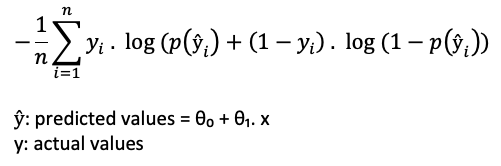

In [32]:
def logloss(y_true, y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  log_loss = -1 * np.mean( y_true*np.log10(y_pred) + (1-y_true)*np.log10(1-y_pred)) 
  return log_loss


In [33]:
true1=[1,1,0,1,0]
pred=[0.9,0.8,0.1,0.8,0.2]
logloss(true1, pred)

0.07644900402910389

4. Compute gradient w.r.to 'w'


In [34]:
def gradient_dw(x, y, w, b, alpha, N):
  '''In this function, we will compute the gardient w.r.to w ''' 
  dw = x * (y-sigmoid(np.dot(w.T,x)+b)) - ((alpha*w*w)/N)
  return dw

5. Compute gradient w.r.to 'b'

In [35]:
def gradient_db(x, y, w, b):
  '''In this function, we will compute gradient w.r.to b ''' 
  db = y-sigmoid(np.dot(w.T,x)+b)
  return db

In [36]:
def train(X_train, y_train, X_test, y_test, epochs, alpha, eta0):
  w, b = initialize_weights(X_train[0])
  N = len(X_train)
  log_loss_train = []
  log_loss_test = []

  for i in range(0, epochs):

    for j in range(N):
      grad_dw = gradient_dw(X_train[j], y_train[j], w, b, alpha, N)
      grad_db = gradient_db(X_train[j], y_train[j], w, b)
      w = np.array(w) + (eta0 * np.array(grad_dw))
      b = b + (eta0 * grad_db)

    # predict the output of x_train[for all data points in X_train] using w and b
    predict_train = []
    for m in range(len(y_train)):
        z = np.dot(w, X_train[m])+b
        predict_train.append(sigmoid(z)) 
    
    # store all the train loss values in a list
    train_loss = logloss(y_train, predict_train)

    # predict the output of x_test[for all data points in X_test] using w,b
    predict_test = []
    for m in range(len(y_test)):
        z = np.dot(w, X_test[m])+b
        predict_test.append(sigmoid(z))
    
    # store all the test loss values in a list
    test_loss = logloss(y_test, predict_test)

    # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b
    if log_loss_train and train_loss > log_loss_train[-1]: # and log_loss_te st and test_loss > log_loss_test[-1]:
      return w, b, log_loss_train, log_loss_test 
    
    log_loss_train.append(train_loss)
    log_loss_test.append(test_loss)

  return w, b, log_loss_train, log_loss_test

In [37]:
alpha  = 0.0001
eta0   = 0.0001
epochs = 50
w, b, log_loss_train, log_loss_test = train(x_train_standard, y_train, x_test_standard, y_test, epochs, alpha, eta0)

In [38]:
print ("weight vector: ", w)
print ("Intercept: ", b)
print ("log loss train", log_loss_train)
print ("log loss test", log_loss_test)

weight vector:  [-0.97125471  0.6951594  -0.1064887   0.68159065 -0.4447256   1.00799626
 -0.94341151 -0.07316669  0.44633501  0.47814799  0.27402291  0.06013621
 -0.09610527  0.57042941  0.06404642]
Intercept:  -1.36913995538139
log loss train [0.2072978176856388, 0.1855621011425784, 0.1765965205148804, 0.1720128945861392, 0.16938000846776094, 0.16775336536080337, 0.166697762591738, 0.16598837463552418, 0.16549918192680005, 0.165155139127557, 0.16490944265652965, 0.16473183085833035, 0.16460216938827593, 0.16450674965688877, 0.16443606112668227, 0.16438340292881937, 0.16434399282823317, 0.16431438103363438, 0.16429205635315808, 0.1642751767820529, 0.16426238234696067, 0.16425266335708577, 0.16424526659202884, 0.16423962783801802, 0.1642353229539555, 0.16423203211204207, 0.16422951349569845, 0.1642275838437443, 0.16422610398746698, 0.1642249680526978, 0.16422409536760615, 0.16422342437809112, 0.16422290805939363, 0.1642225104471715, 0.16422220400903284, 0.16422196764897404, 0.164221785

Compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [39]:
clf.intercept_, clf.coef_

(array([-1.30580538]),
 array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]))